# !pip install opencv-python
# !pip install keras
# !pip install tensorflow

In [2]:
import numpy as np
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [46]:
#loading the MNISt dataset
(x_train, y_train), (x_test, y_test) = load_data()

# Reshaping the training and testing data
#x_train = x_train.reshape(x_train.shape[0], 28,28,1)
#x_test = x_test.reshape(x_test.shape[0], 1,1,1)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [20]:
#normalizing the values of pixels of images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [22]:
# Create a figure for plotting
fig = plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

In [24]:
# Plotting the first 15 images
for i in range(15):
    ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='gray')
    ax.set_title(y_train[i])

In [26]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [28]:
#determine the shape of the input images
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [30]:
#defining the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) 
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 600,810 (2.29 MB)

 Trainable params: 600,810 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x = model.fit(x_train, y_train, epochs=10, batch_size=120, verbose=2, validation_split=0.1)

Epoch 1/10
450/450 - 23s - 50ms/step - accuracy: 0.9062 - loss: 0.3059 - val_accuracy: 0.9828 - val_loss: 0.0627
Epoch 2/10
450/450 - 22s - 49ms/step - accuracy: 0.9641 - loss: 0.1186 - val_accuracy: 0.9867 - val_loss: 0.0476
Epoch 3/10
450/450 - 23s - 52ms/step - accuracy: 0.9721 - loss: 0.0914 - val_accuracy: 0.9897 - val_loss: 0.0394
Epoch 4/10
450/450 - 22s - 48ms/step - accuracy: 0.9760 - loss: 0.0760 - val_accuracy: 0.9907 - val_loss: 0.0342
Epoch 5/10
450/450 - 21s - 46ms/step - accuracy: 0.9793 - loss: 0.0684 - val_accuracy: 0.9898 - val_loss: 0.0366
Epoch 6/10
450/450 - 21s - 47ms/step - accuracy: 0.9813 - loss: 0.0600 - val_accuracy: 0.9915 - val_loss: 0.0354
Epoch 7/10
450/450 - 18s - 40ms/step - accuracy: 0.9819 - loss: 0.0566 - val_accuracy: 0.9903 - val_loss: 0.0371
Epoch 8/10
450/450 - 18s - 41ms/step - accuracy: 0.9844 - loss: 0.0513 - val_accuracy: 0.9905 - val_loss: 0.0367
Epoch 9/10
450/450 - 18s - 40ms/step - accuracy: 0.9847 - loss: 0.0472 - val_accuracy: 0.9908 - 

In [38]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.11999702453613


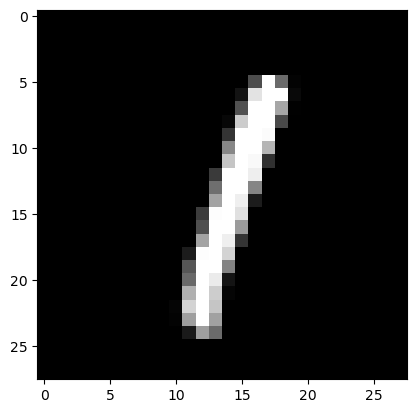

In [50]:
image = x_test[5]
#let's display the image which we want to predict
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [52]:
image = image.reshape(1, 28, 28, 1)
p = model.predict([image])
print('Predicted: {}'.format(np.argmax(p)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted: 1
